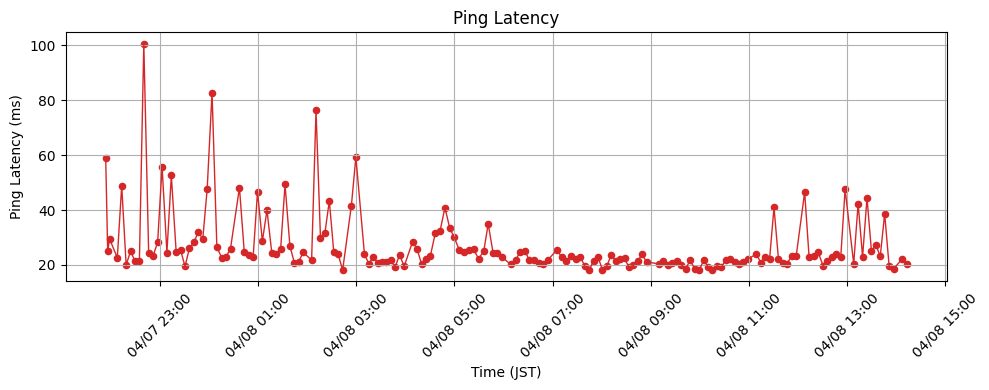

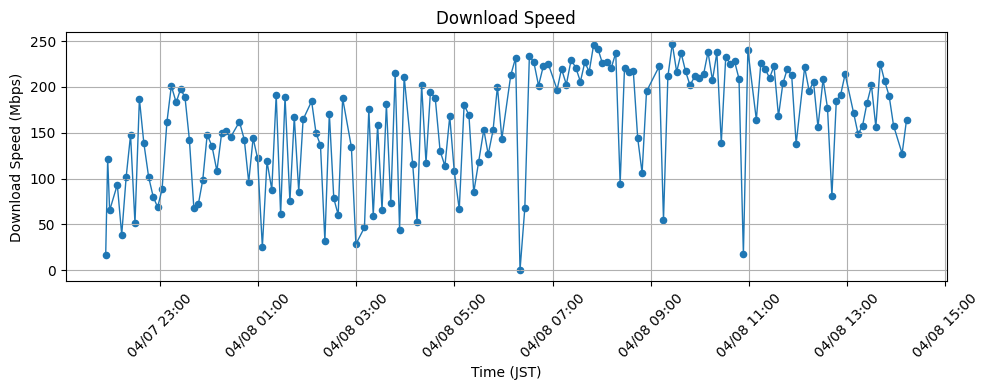

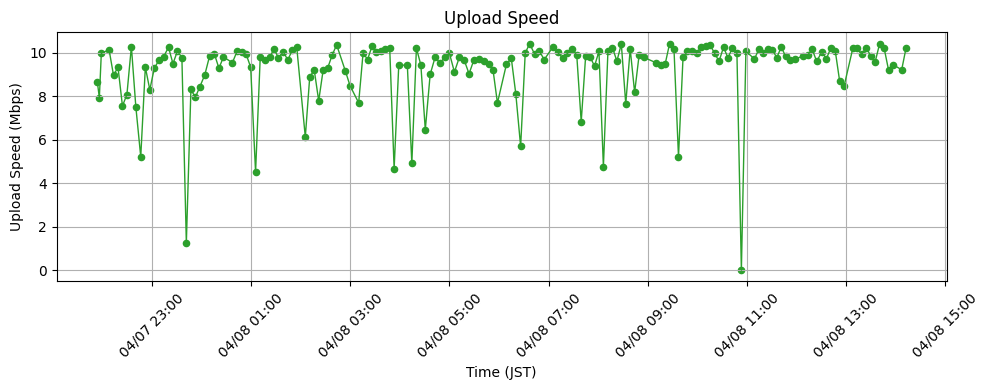

In [31]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone
import matplotlib.dates as mdates

# JSONデータを読み込む
with open('test.json') as f:
    data = json.load(f)

# タイムゾーンを東京に設定
jst = timezone('Asia/Tokyo')

# タイムスタンプ、ping、download、uploadのデータを抽出
timestamps = []
ping_latencies = []
download_speeds = []
upload_speeds = []

for result in data:
    timestamp = datetime.fromisoformat(result['timestamp'].replace('Z', '+00:00'))
    timestamps.append(timestamp)  # 時刻のみを抽出
    ping_latencies.append(result['ping'])
    download_speeds.append(result['download'] / 1000000)  # Mbpsに変換
    upload_speeds.append(result['upload'] / 1000000)  # Mbpsに変換

# JSTを表示するためのフォーマッター
jst_formatter = mdates.DateFormatter('%m/%d %H:%M', tz=jst)

# pingのグラフをプロット
plt.figure(figsize=(10, 4))
plt.scatter(timestamps, ping_latencies, color='tab:red', marker='o', s=20)
plt.plot(timestamps, ping_latencies, color='tab:red', linewidth=1)
plt.xlabel('Time (JST)')
plt.ylabel('Ping Latency (ms)')
plt.title('Ping Latency')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(jst_formatter)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # 時刻を45度回転
plt.tight_layout()
plt.show()

# download速度のグラフをプロット
plt.figure(figsize=(10, 4))
plt.scatter(timestamps, download_speeds, color='tab:blue', marker='o', s=20)
plt.plot(timestamps, download_speeds, color='tab:blue', linewidth=1)
plt.xlabel('Time (JST)')
plt.ylabel('Download Speed (Mbps)')
plt.title('Download Speed')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(jst_formatter)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # 時刻を45度回転
plt.tight_layout()
plt.show()

# upload速度のグラフをプロット
plt.figure(figsize=(10, 4))
plt.scatter(timestamps, upload_speeds, color='tab:green', marker='o', s=20)
plt.plot(timestamps, upload_speeds, color='tab:green', linewidth=1)
plt.xlabel('Time (JST)')
plt.ylabel('Upload Speed (Mbps)')
plt.title('Upload Speed')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(jst_formatter)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # 時刻を45度回転
plt.tight_layout()
plt.show()